**Laboratorio de Métodos Cuantitativos Aplicados a la Gestión**

---

# **Clase - Integrales indefinidas en el análisis económico**


In [193]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

## Repaso conceptual y definición operativa

**¿Qué es una integral indefinida?**

Sea $f(x)$ una función.

Una *función primitiva* o *integral indefinida* de $f(x)$ es cualquier función \(F(x)\) tal que: $$ F^{\prime} (x) = f(x) $$

y se escribe $$ \int f(x) \ dx = F(x) + C $$

donde $C$ es una *constante de integración* (puede tomar cualquier valor real).

> **Derivar** e **integrar** son operaciones inversas: la integral es la *anti-derivada*.

Normalmente, procedemos de la siguiente forma:
1. Integrar la función derivada para obtener una familia $F(x) + C$.
2. Usar una condición (por ejemplo, $C(0) = F$) para determinar el valor de $C$.

### Resolución en `SymPy` y ejemplos

De la misma manera que `SymPy` simplificaba la derivación con `sp.diff`, también simplifica la integración de funciones simbólicas con `sp.integrate`.

Los argumentos son equivalentes entre ambas funciones incorporadas en `SymPy`: se requiere especificar la función a integrar así como la variable de integración.

Veamos algunos ejemplos simples en una variable, $x$.

In [194]:
# Crea una variable simbólica 'x' en SymPy para representar una incógnita matemática.
# A diferencia de x = 0, esta variable no tiene valor numérico y permite manipulación algebraica.
x = sp.symbols('x')
x

x

Consideremos la siguiente función polinómica: $$f(x) = 3 \cdot x^{2}$$

In [195]:
f1 = 3*x**2
f1

3*x**2

Integrar esta función arroja:  $$ \int f(x) \ dx = \int 3 \cdot x^{2} \ dx = x^{3} + C $$

y, asumiendo -por ahora- que $C = 0$, sabemos que: $$F(x) = x^{3}$$

In [196]:
# Calcula la integral indefinida de f1 respecto de x usando SymPy.
# Argumentos: f1 (expresión simbólica a integrar), x (variable de integración)
# Output: F1 es la antiderivada simbólica de f1 respecto de x
F1 = sp.integrate(f1, x)
F1

x**3

Similarmente, si tuviéramos una función exponencial: $$f(x) = e^{x}$$

entonces su integral indefinida sería:$$ \int f(x) \ dx = \int e^{x} \ dx = e^{x} + C $$

y, asumiendo $C = 0$, se tiene que: $$F(x) = e^{x}$$

In [197]:
f2 = sp.exp(x)
f2

exp(x)

In [198]:
F2 = sp.integrate(f2, x)
F2

exp(x)

### Determinando la constante de integración

Sin embargo, no siempre es realista asumir que $C$, nuestra constante de integración, es igual a 0.

Existen condiciones iniciales que pueden violar esta igualdad, por lo que necesitamos un método para computar $C$ en sintonía con esta situación inicial.

Sea $f(x) = 2 \cdot x$.

In [199]:
f3 = 2 * x
f3

2*x

Añadimos la expresión simbólica de $C$.

In [200]:
C = sp.symbols('C')
C

C

Y, luego, al integrar, computamos la integral de $f$ (`f3`) sumada a la constante de integración.

In [201]:
F3 = sp.integrate(f3, x) + C
F3

C + x**2

¿Cómo resolvemos, entonces, para obtener $C$, la constante de integración? Debemos suponer una condición inicial (si esta no viene especificada).

Supongamos $F(0) = 5$.

In [202]:
# Creamos una ecuación que establece la condición inicial: F3(0) = 5
# Esto nos permite encontrar el valor específico de la constante C
condicion = sp.Eq(F3.subs(x, 0), 5)
condicion

Eq(C, 5)

Ahora, resolvemos normalmente para $C$, utilizando `sp.solve`.

In [203]:
# Resuelve algebraicamente una ecuación para encontrar el valor de la constante de integración C
# Inputs: 
#   - condicion: ecuación simbólica creada con sp.Eq() que establece la condición inicial
#   - C: variable simbólica a despejar (la constante de integración)
# Output: [0] extrae el primer valor de la lista de soluciones (generalmente única)
# Caso de uso: determinar la constante C cuando conocemos un valor específico de la función primitiva
# Ejemplo: si F(0) = 5, resolvemos para C y obtenemos el valor numérico que satisface esta condición
C_val = sp.solve(condicion, C)[0]
C_val

5

Con `C_val` computado, reemplazamos en la expresión de $F$ (`F3`).

In [204]:
F3 = F3.subs(C, C_val)
F3

x**2 + 5

## Aplicaciones: funciones marginales y totales

Comencemos a calcular funciones totales a partir de funciones marginales, utilizando integrales indefinidas.

### Costo marginal y total

Veamos el siguiente ejemplo.

Sea una función de costo **marginal**: $$ CMg = \alpha \cdot q + \beta$$ donde $\alpha$ y $\beta$ son dos parámetros positivos: $\alpha, \beta > 0$.

Nuestro objetivo será recuperar $C(q)$, es decir, la función de costo total que da origen a la función de costo marginal.

Sabemos que $$ \int (\alpha \cdot q + \beta) \ dq = \frac{\alpha}{2} \cdot q^2 + \beta \cdot q + C \quad\Rightarrow\quad C(q)=\frac{\alpha}{2} \cdot q^2 + \beta \cdot q + F $$

Probemoslo en `SymPy`.

In [205]:
q = sp.symbols('q')

In [206]:
alpha, beta, F = sp.symbols('alpha beta F')
print(alpha)
print(beta)
print(F)

alpha
beta
F


In [207]:
CMg = alpha*q + beta
CMg

alpha*q + beta

In [208]:
C = sp.integrate(CMg, q) + F
C

F + alpha*q**2/2 + beta*q

Entonces, vemos que recuperamos `C` a partir de `CMg`. ¿Cómo visualizamos esto?

In [209]:
alpha_val, beta_val, F_val = 0.8, 10.0, 120.0

In [210]:
# Crea una grilla de valores equidistantes para evaluar funciones y generar gráficos suaves
# Inputs: inicio (0), fin (100), cantidad de puntos (300)
# Output: array de NumPy con 300 valores uniformemente espaciados entre 0 y 100
# Caso de uso: dominio de la variable q (cantidad) para graficar funciones económicas
q_grid = np.linspace(0, 100, 300)

In [211]:
# Sustituimos los parámetros simbólicos por valores numéricos concretos
# Esto convierte el modelo general en un caso específico para análisis y visualización
# El método .subs() reemplaza las variables simbólicas por sus valores numéricos asignados
C = C.subs(
    {alpha: alpha_val,
     beta: beta_val,
     F: F_val}
)

CMg= CMg.subs(
    {alpha: alpha_val,
     beta: beta_val,
     F: F_val}
)

In [212]:
# Convertimos la expresión simbólica CMg a una función numérica evaluable con lambdify
# Luego evaluamos esta función sobre todos los puntos de q_grid para obtener valores numéricos
CMg_num  = sp.lambdify(q, CMg)
CMg_vals = CMg_num(q_grid)

In [213]:
# Convertimos la expresión simbólica C a una función numérica evaluable
C_num  = sp.lambdify(q, C)
C_vals = C_num(q_grid)

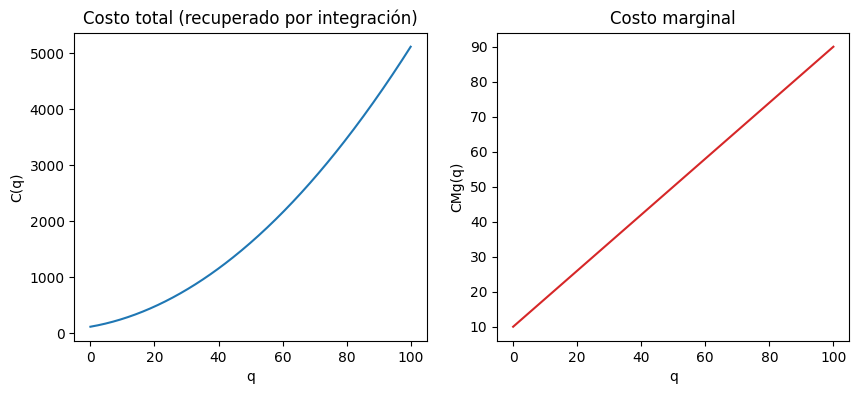

In [214]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(q_grid, C_vals)
axs[0].set_title("Costo total (recuperado por integración)")
axs[0].set_xlabel("q")
axs[0].set_ylabel("C(q)")

axs[1].plot(q_grid, CMg_vals, color="tab:red")
axs[1].set_title("Costo marginal")
axs[1].set_xlabel("q")
axs[1].set_ylabel("CMg(q)")

plt.show()

#### Costo Marginal convexo

En el caso anterior, nuestro costo marginal era: $$CMg = \alpha \cdot q + \beta$$

de manera que se trataba de una función lineal.

Pensemos, ahora, un costo marginal cuadrático, tal que: $$CMg = \alpha \cdot q + \gamma \cdot q^{2} + \beta$$

In [215]:
gamma, CF = sp.symbols('gamma CF')

In [216]:
CMg_2 = alpha*q + gamma * q**2 + beta
CMg_2

alpha*q + beta + gamma*q**2

Sabemos que $$ \int (\alpha \cdot q + \gamma \cdot q^{2} + \beta) \ dq = \frac{\alpha}{2} \cdot q^2 + \frac{\gamma}{3} \cdot q^3 + \beta \cdot q + C \quad\Rightarrow\quad C(q)=\frac{\alpha}{2} \cdot q^2 + \frac{\alpha}{3} \cdot q^3 + \beta \cdot q + F $$

Probemoslo en `SymPy`.

In [217]:
C_2 = sp.integrate(CMg_2, q) + CF
C_2

CF + alpha*q**2/2 + beta*q + gamma*q**3/3

Visualizamos igual que anteriormente.

In [218]:
gamma_val, CF_val  = 0.2, 120.0

In [219]:
q_grid = np.linspace(0, 100, 300)

In [220]:
C_2 = C_2.subs(
    {alpha: alpha_val,
     beta: beta_val,
     gamma: gamma_val,
     CF: CF_val}
)

CMg_2 = CMg_2.subs(
    {alpha: alpha_val,
     beta: beta_val,
     gamma: gamma_val,
     CF: CF_val}
)

In [221]:
CMg_2_num  = sp.lambdify(q, CMg_2)
CMg_2_vals = CMg_2_num(q_grid)

In [222]:
C_2_num  = sp.lambdify(q, C_2)
C_2_vals = C_2_num(q_grid)

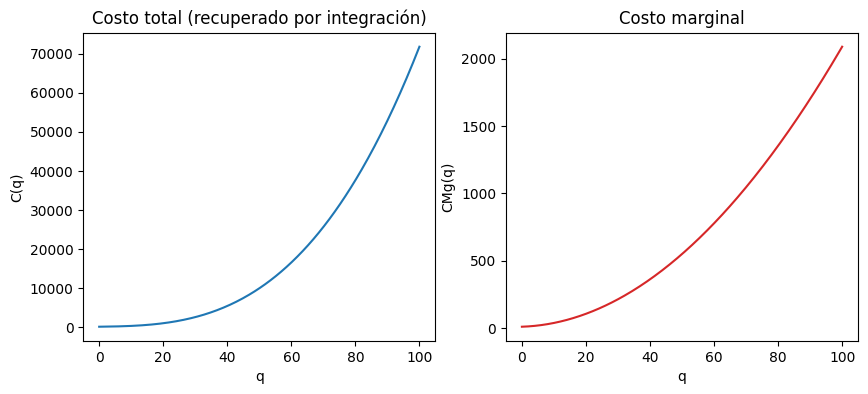

In [223]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(q_grid, C_2_vals)
axs[0].set_title("Costo total (recuperado por integración)")
axs[0].set_xlabel("q")
axs[0].set_ylabel("C(q)")

axs[1].plot(q_grid, CMg_2_vals, color="tab:red")
axs[1].set_title("Costo marginal")
axs[1].set_xlabel("q")
axs[1].set_ylabel("CMg(q)")

plt.show()

### Ingreso marginal, total y equilibrio

Repitamos este ejercicios para el caso del ingreso marginal, $IMg$. Asumiremos un ingreso marginal decreciente y recuperaremos el ingreso total.

Sea la demanda lineal: $$p(q) = a - b \cdot q$$

Naturalmente, el ingreso total es: $$I(q) = p(q) \cdot q$$

y, como vimos en clases anteriores, el ingreso marginal tomará la forma: $$IMg(q) = a - 2 \cdot b \cdot q$$

Hasta acá, ninguna novedad. Ahora, hagamos el camino inverso.

Partimos de $IMg$:

In [224]:
a, b = sp.symbols('a b', positive=True)

In [225]:
IMg = a - 2*b*q
IMg

a - 2*b*q

y obtenemos `I` a partir de la integración con `sp.integrate`.

In [226]:
I = sp.integrate(IMg, q)
I

a*q - b*q**2

¿Por qué no agregamos una constante de integración, $C$? Porque, cuando $q = 0$, sabemos que $I(0) = 0$, de manera que no hay un ingreso fijo ($C = 0$).

Ahora, obtengamos el óptimo -tal cual lo hacíamos anteriormente- de estas funciones.

Supongamos (no siempre debe ser así) que estamos ante un monopolio. En este caso, sabemos que el candidato al óptimo satisface $$IMg = CMg$$

que surgen a partir de una función de demanda lineal $p(q) = a - b\cdot q$ y una función de costo marginal $CMg = \alpha + \beta \cdot q$.

El nivel de $q$ de equilibrio, $q^{*}$, implicará que: $IMg (q^{*}) = CMg (q^{*})$ y, por tanto, $p^{*} = p(q^{*})$ y $B(q^{*}) = I(q^{*}) - C(q^{*})$.

Veámoslo simbólicamente (y numéricamente).

In [227]:
a_val, b_val = 80.0, 0.2

Usamos nuestras expresiones para $CMg$ e $IMg$ antes definidas.

In [228]:
CMg

0.8*q + 10.0

In [229]:
IMg = IMg.subs({
    a: a_val,
    b: b_val
})
IMg

80.0 - 0.4*q

Resolvemos el sistema igualándolas.

In [230]:
# Resuelve algebraicamente la ecuación IMg = CMg para encontrar la cantidad óptima q*
# Inputs: sp.Eq(IMg, CMg) crea la ecuación, q es la variable a resolver
# Output: [0] extrae la primera solución (cantidad que maximiza beneficio)
# Caso de uso: determinar el nivel de producción óptimo en análisis de monopolio
q_opt = sp.solve(sp.Eq(IMg, CMg), q)[0]
q_opt

58.3333333333333

Recuperemos $p(q)$, $I(q)$, $C(q)$ y $B(q)$, sin evaluar en $q = q^{*}$.

In [231]:
p = (a_val - b_val * q)
p

80.0 - 0.2*q

In [232]:
I = sp.integrate(IMg, q)
I

-0.2*q**2 + 80.0*q

In [233]:
C = (sp.integrate(CMg, q) + F_val).subs({
       a: a_val,
       b: b_val,
       alpha: alpha_val,
       beta: beta_val
    }
)
C

0.4*q**2 + 10.0*q + 120.0

In [234]:
p, I, C

(80.0 - 0.2*q, -0.2*q**2 + 80.0*q, 0.4*q**2 + 10.0*q + 120.0)

In [235]:
B = I - C
B

-0.6*q**2 + 70.0*q - 120.0

En equilibrio:

In [236]:
p_opt = p.subs(q, q_opt)
B_opt = B.subs(q, q_opt)

q_opt, p_opt, B_opt

(58.3333333333333, 68.3333333333333, 1921.66666666667)

Como anteriormente, podemos visualizar el sistema y equilibrio.

In [237]:
q_grid = np.linspace(0, 100, 300)
q_grid

array([  0.        ,   0.33444816,   0.66889632,   1.00334448,
         1.33779264,   1.6722408 ,   2.00668896,   2.34113712,
         2.67558528,   3.01003344,   3.34448161,   3.67892977,
         4.01337793,   4.34782609,   4.68227425,   5.01672241,
         5.35117057,   5.68561873,   6.02006689,   6.35451505,
         6.68896321,   7.02341137,   7.35785953,   7.69230769,
         8.02675585,   8.36120401,   8.69565217,   9.03010033,
         9.36454849,   9.69899666,  10.03344482,  10.36789298,
        10.70234114,  11.0367893 ,  11.37123746,  11.70568562,
        12.04013378,  12.37458194,  12.7090301 ,  13.04347826,
        13.37792642,  13.71237458,  14.04682274,  14.3812709 ,
        14.71571906,  15.05016722,  15.38461538,  15.71906355,
        16.05351171,  16.38795987,  16.72240803,  17.05685619,
        17.39130435,  17.72575251,  18.06020067,  18.39464883,
        18.72909699,  19.06354515,  19.39799331,  19.73244147,
        20.06688963,  20.40133779,  20.73578595,  21.07

In [238]:
C, CMg

(0.4*q**2 + 10.0*q + 120.0, 0.8*q + 10.0)

In [239]:
I, IMg

(-0.2*q**2 + 80.0*q, 80.0 - 0.4*q)

In [240]:
CMg_num  = sp.lambdify(q, CMg)
CMg_vals = CMg_num(q_grid)
C_num  = sp.lambdify(q, C)
C_vals = C_num(q_grid)

In [241]:
IMg_num  = sp.lambdify(q, IMg)
IMg_vals = IMg_num(q_grid)
I_num  = sp.lambdify(q, I)
I_vals = I_num(q_grid)

In [242]:
B_num  = sp.lambdify(q, B)
B_vals = B_num(q_grid)

In [243]:
p_num  = sp.lambdify(q, p)
p_vals = p_num(q_grid)

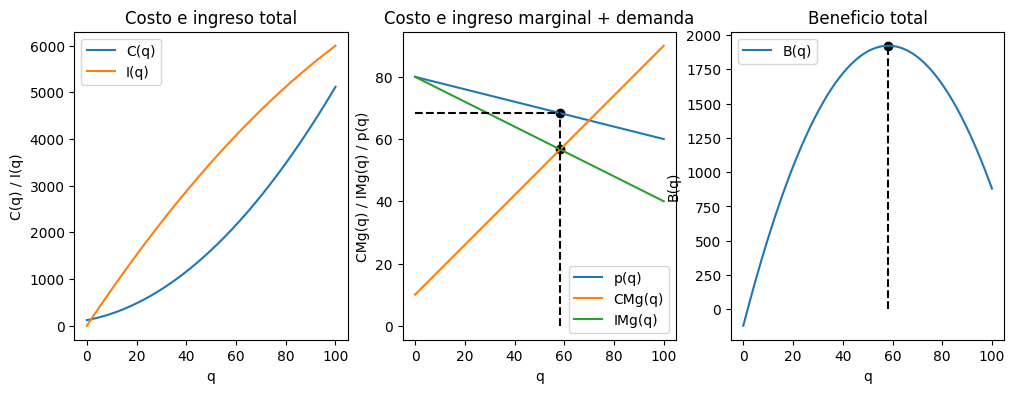

In [244]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].plot(q_grid, C_vals, label="C(q)")
axs[0].plot(q_grid, I_vals, label="I(q)")
axs[0].set_title("Costo e ingreso total")
axs[0].set_xlabel("q")
axs[0].set_ylabel("C(q) / I(q)")
axs[0].legend()

axs[1].plot(q_grid, p_vals, label="p(q)")
axs[1].plot(q_grid, CMg_vals, label="CMg(q)")
axs[1].plot(q_grid, IMg_vals, label="IMg(q)")
axs[1].set_title("Costo e ingreso marginal + demanda")
axs[1].set_xlabel("q")
axs[1].set_ylabel("CMg(q) / IMg(q) / p(q)")
axs[1].scatter(q_opt, CMg.subs(q, q_opt), c="black")
axs[1].scatter(q_opt, p_opt, c="black")
axs[1].hlines(y=p_opt,
               color="black",
               linestyle="--",
               xmin=0,
               xmax=q_opt)
axs[1].vlines(x=q_opt,
               color="black",
               linestyle="--",
               ymin=0,
               ymax=p_opt)
axs[1].legend()

axs[2].plot(q_grid, B_vals, label="B(q)")
axs[2].set_title("Beneficio total")
axs[2].set_xlabel("q")
axs[2].set_ylabel("B(q)")
axs[2].scatter(q_opt, B.subs(q, q_opt), c="black")
axs[2].vlines(x=q_opt,
               color="black",
               linestyle="--",
               ymin=0,
               ymax=B.subs(q, q_opt)
)
axs[2].legend()

plt.show()

### Producto total y producto marginal

Supongamos función de producto marginal con rendimientos decrecientes: $$ PMg(L)=\gamma \cdot L^{\delta} $$

con $-1 < \delta < 1$.

Siempre que $P(0) = 0$, sabemos que: $$P(L) = \int \gamma \cdot L^{\delta} \ dL = \frac{\gamma}{\delta+1} \cdot L^{\delta+1}$$

Resolvamos en `SymPy`.

In [245]:
L, gamma, delta = sp.symbols('L gamma delta')

In [246]:
PMg = gamma*L**delta
PMg

L**delta*gamma

In [247]:
P = sp.integrate(PMg, L)
P

gamma*Piecewise((L**(delta + 1)/(delta + 1), Ne(delta, -1)), (log(L), True))

In [248]:
P = sp.simplify(P)
P

Piecewise((L**(delta + 1)*gamma/(delta + 1), (delta > -1) | (delta < -1)), (gamma*log(L), True))

Gráficamente:

In [249]:
L_grid = np.linspace(0, 500, 300)

In [250]:
gamma_val, delta_val = 15.0, 0.4

In [251]:
P = P.subs(
    {gamma: gamma_val,
     delta: delta_val
     }
)

PMg = PMg.subs(
    {gamma: gamma_val,
     delta: delta_val
     }
)

In [252]:
PMg_num  = sp.lambdify(L, PMg)
PMg_vals = PMg_num(L_grid)

In [253]:
P_num  = sp.lambdify(L, P)
P_vals = P_num(L_grid)

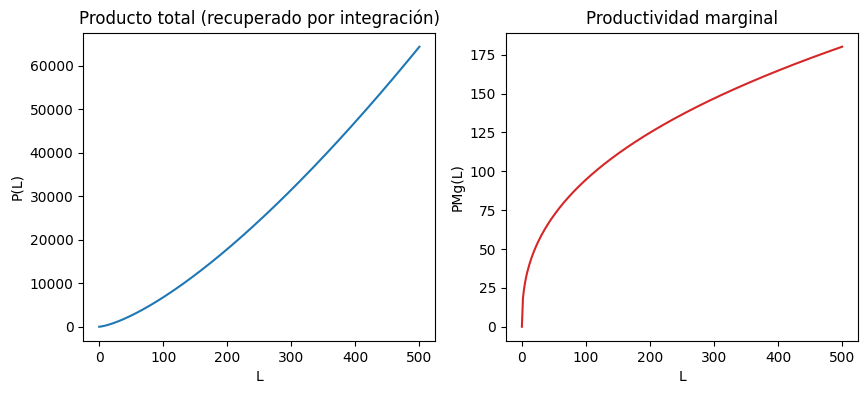

In [254]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(L_grid, P_vals)
axs[0].set_title("Producto total (recuperado por integración)")
axs[0].set_xlabel("L")
axs[0].set_ylabel("P(L)")

axs[1].plot(L_grid, PMg_vals, color="tab:red")
axs[1].set_title("Productividad marginal")
axs[1].set_xlabel("L")
axs[1].set_ylabel("PMg(L)")

plt.show()

## Actividad de Ejercitación

**Problema:**

Supongamos que la función de ingreso marginal de una empresa está dada por:

$$ IMg(q) = 50 - 0.5 \cdot q $$

donde $q$ es la cantidad producida.

Además, sabemos que el costo marginal de la empresa es:

$$ CMg(q) = 10 + 0.3 \cdot q $$

y que el costo fijo es de $100.

**Resolver los siguientes puntos:**

1.  **Recuperar la función de ingreso total (I(q))**: Utiliza la integral indefinida para obtener la función de ingreso total a partir del ingreso marginal. Recuerda que el ingreso total es cero cuando la cantidad producida es cero ($I(0) = 0$).
2.  **Recuperar la función de costo total (C(q))**: Utiliza la integral indefinida para obtener la función de costo total a partir del costo marginal. Utiliza la información del costo fijo para determinar la constante de integración.
3.  **Calcular la función de beneficio total (B(q))**: Resta la función de costo total de la función de ingreso total para obtener la función de beneficio total.
4.  **Encontrar la cantidad óptima (q*)**: Determina la cantidad de producción que maximiza el beneficio igualando el ingreso marginal al costo marginal ($IMg(q) = CMg(q)$) y resolviendo para $q$.
5.  **Calcular el beneficio máximo (B(q*))**: Sustituye la cantidad óptima ($q^{*}$) en la función de beneficio total para encontrar el beneficio máximo.
6.  **Visualizar las funciones**: Grafica las funciones de ingreso total, costo total y beneficio total en el mismo gráfico para visualizar el punto de beneficio máximo.